In [1]:
import GA as ga
import numpy as np 
import matplotlib.pyplot as plt 

np.random.choice([0, 1], size=(4)) 

array([1, 1, 1, 1])

In [2]:
equation_inputs = [4, -2, 7, -5, 11, 1]
num_weights = len(equation_inputs)
sol_per_pop = 50
num_parents_mating = 25
pop_size = (sol_per_pop,num_weights) 
new_population = np.random.uniform(low = -4.0, high = 4.0, size = pop_size)
print('======================New Population=======================')
print(new_population)

best_outputs = []
num_generations = 2

for generation in range(num_generations):
    print(f'======================GENERATION {generation}=======================')
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print(fitness)

    # SELECTION
    print('======================SELECTION=======================')
    best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
    print("Best result : ", np.max(np.sum(new_population*equation_inputs, axis=1)))
    parents = ga.select_mating_pool(new_population, fitness, 
    num_parents_mating)
    print(parents)

    # CROSSOVER
    print('======================CROSSOVER=======================')
    offspring_crossover = ga.crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print(offspring_crossover)

    # MUTATION
    print('======================MUTATION=======================')
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print(offspring_mutation)

    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    print()
    print()
    print()

fitness = ga.cal_pop_fitness(equation_inputs, new_population)

best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

======================New Population=======================
[[-2.0835897   3.45293428  0.48049075 -0.913062   -3.43953849 -0.44606184]
 [-2.19333737 -0.15790678  0.53634606 -3.34498844 -1.31234978  0.14993003]
 [ 1.21110802 -2.46025851 -2.94188567  2.24622555 -2.93919762 -3.52690059]
 [ 2.78509881 -2.00851891 -1.88837713 -0.4445915   2.34653366  1.00552765]
 [ 2.15797496  0.32732733  2.28263156  3.23879113 -1.16563925 -3.89013942]
 [-3.22728815 -2.46291653 -0.99948027 -1.59759075 -1.99080351 -1.60097245]
 [-2.13970682  2.6165376  -2.3831595  -3.03611615  2.36855677 -2.86952257]
 [ 3.28382949 -0.7180996   1.0910204  -3.82476174 -0.84989134  3.2075182 ]
 [-2.18747397  1.005164   -2.05635053 -0.6403132   3.80737686  1.32833396]
 [-3.95945291  0.70572877  0.00601551  3.70825233  3.69369216  1.90196239]
 [-1.96494383  2.06178563 -1.77604275 -1.1989957  -0.95517238  3.34402067]
 [ 1.44604772 -3.28174163 -0.98856921 -3.66690496  0.60058559  0.24025675]
 [ 2.10027085  0.42266713 -3.23390914  3

In [4]:
for_selection = [45, 62, 17, 10, 47, 30, 52, 8]
selection_by_parents = []
for idx in for_selection:
    sum_value = sum(for_selection)
    selection_by_parents.append(idx/sum_value)
selection_by_parents

[0.16605166051660517,
 0.22878228782287824,
 0.06273062730627306,
 0.03690036900369004,
 0.17343173431734318,
 0.11070110701107011,
 0.1918819188191882,
 0.02952029520295203]

In [5]:
selection = []
for select in range(len(selection_by_parents)):
    selection.append(sum(selection_by_parents[0:select]))
selection

[0,
 0.16605166051660517,
 0.3948339483394834,
 0.4575645756457564,
 0.49446494464944646,
 0.6678966789667896,
 0.7785977859778597,
 0.9704797047970479]

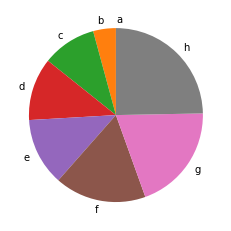

In [80]:
y = selection
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
plt.pie(y, labels = labels, startangle = 90)
plt.show() 

In [10]:
np.round(np.random.uniform(low = 0, high = 1.0, size = 6), 4)

array([0.6695, 0.7957, 0.4672, 0.1203, 0.1117, 0.9685])

===================Parent: 5, Genes: 10===================
Best solution :  [[[ 2.29398552  3.91160921 13.96823819 -2.44508384  1.21461766
    5.76417603]]]
Best solution fitness :  [130.48078047]


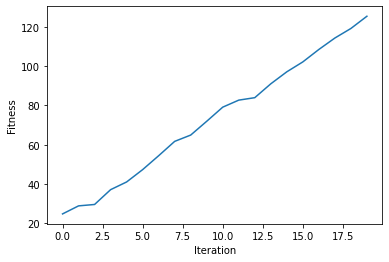

===================Parent: 6, Genes: 12===================
Best solution :  [[[-0.54341772 -0.28716431 12.62990061 -2.65411722  2.17444703
    6.71469356]]]
Best solution fitness :  [130.71415896]


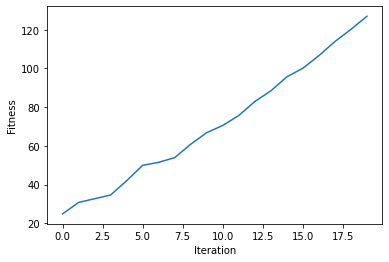

===================Parent: 7, Genes: 14===================
Best solution :  [[[-1.82785718 -2.57738625 16.4703913  -1.96371923  1.97316459
    4.79127974]]]
Best solution fitness :  [149.45076925]


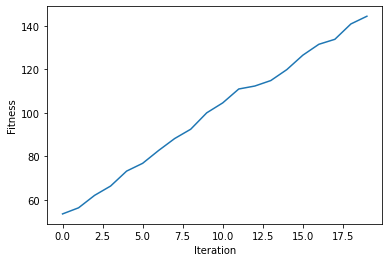

===================Parent: 8, Genes: 16===================
Best solution :  [[[ 3.83037998  1.03765306 14.08308864 -2.6639464   3.53560356
    9.63163395]]]
Best solution fitness :  [173.67083937]


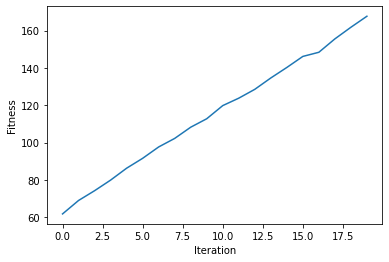

===================Parent: 9, Genes: 18===================
Best solution :  [[[ 2.39901082 -2.69348645 17.70889671 -0.43397522  2.71139645
    8.9261011 ]]]
Best solution fitness :  [179.86663128]


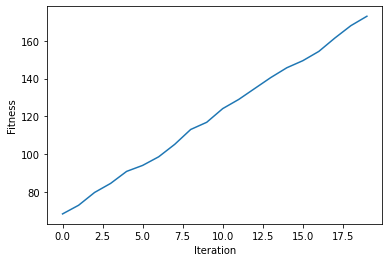

In [56]:
import GA as ga

def main(parents, genes, generations = 50):
    equation_inputs = [4, -2, 7, -5, 11, 1]
    num_weights = len(equation_inputs)
    sol_per_pop = genes
    num_parents_mating = parents
    pop_size = (sol_per_pop,num_weights) 
    new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)

    best_outputs = []
    num_generations = generations
    for generation in range(num_generations):
        fitness = ga.cal_pop_fitness(equation_inputs, new_population)

        # SELECTION
        best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
        parents = ga.select_mating_pool(new_population, fitness, 
        num_parents_mating)

        # CROSSOVER
        offspring_crossover = ga.crossover(parents,
        offspring_size=(pop_size[0]-parents.shape[0], num_weights))

        # MUTATION
        offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)

        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation

    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
    print("Best solution : ", new_population[best_match_idx, :])
    print("Best solution fitness : ", fitness[best_match_idx])
    plt.plot(best_outputs)
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

parent_list = np.arange(5, 10)
genes_list  = np.arange(10, 20, 2)
for parent, gene in zip(parent_list, genes_list):
    print(f'===================Parent: {parent}, Genes: {gene}===================')
    main(parent, gene, generations = 20)